In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/MyDrive/project_2.0

/content/drive/MyDrive/project_2.0


In [4]:
!ls

Jewelry_Dataset.csv  notebook.ipynb


## 1. Project Title: Machine Learning for Jewellry Price Optimization

This project aims to successfully predict the prices of jewellry pieces. This will allow the jewelry company reduce their dependence on gemolosists and expensive experts.

---

## 2. Methodology

This project will be carried out using the __CRISP-DM__ methodology. This is one of the more popular data science methodologies and is characterized by six important phases, which are as follows:

1. _Business Understanding_,
2. _Data Understanding_,
3. _Data Preparation_,
4. _Data Modelling_,
5. _Model Evaluation_, and
6. _Model Deployment_.

It should be noted that these phases are usually recurrent in nature (i.e., some phases may be repeated). As such, they do not necessarily follow a linear progression.

---

## 3. Tools

The tools of use for this project include:

1. _Pandas_
2. _NumPy_
3. _Matplotlib_ & _Seaborn_

#### 3.1. Pandas & NumPy

__Pandas__ is a Python library built upon the __NumPy__ library. The idea behind _Pandas_ is to be able to operate on text data, where _NumPy_ is best suited for numerical operations, irrespective of the fact that it can represent text to some degree.

#### 3.2. Matplotlib & Seaborn

__Matplotlib__ and __Seaborn__ are Python libraries for data visualization. Other alternatives include __Bokeh__ and __Plotly__.

---

<div align="center"><h1>Project Implementation via CRISP-DM</h1></div>

---

<div><h3>01. Business Understanding</h3></div>


__Gemineye Emporium__ is a boutique jewelry store based in New York City, U.S., specializing in the sale of high-quality jewelry, in both gemstones and precious metals. They are dedicated to providing customers with exquisite pieces within a market as competitive as the jewelry market.

Specifically, with all the hype about AI and ML, they are interested in leveraging the tools for predicting their jewelery prices. This will be advantageous in optimizing their prices for market, without the need for employing expensive gemologists and certified appraisers.

In order to train the needed machine learning models, the IT team at Gemineye Emporium will need data that records and describes the conditions and state of different jewellery pieces, such as the target gender of the piece, the metal the piece is made of, the gem mounted on the piece, amongst others.

---

<div><h3>02. Data Understanding</h3></div>

With the _**Business Understanding**_ out of the way, the next step is to understand the data to be obtained and used for the task. This will involve the process of __*Exploratory Data Analysis (EDA)*__.

EDA is the process of sifting through data with the goal of extracting insights. These insights allow a better understanding of the available data and what can be done with it. They can also be used for guided preparation of the dataset in the appropriate manner. Just like regular analysis, EDA begins with a set of __questions__ and/or __hypotheses__. The EDA process will then prove or disprove these hypotheses, and hopefully, reveal other points of inquiry along the way.

The required libraries and packages are imported first. The EDA process is carried out here as shown below. The high-level steps to follow are:

1. Import the required libraries
2. Load in the dataset
3. Analyze and observe its properties.
   * Missing data
   * Inconsistent values
   * Low categorical cardinality
   * Feature correlations
4. Report on these properties and how they might affect our final solution.

<div align="center"><h3>2.1. Enter EDA Code Here</h3></div>

In [5]:
# Import required utilities
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

from sklearn.neighbors import LocalOutlierFactor

In [6]:
# Seed for reproducibility
SEED = np.random.seed(seed = 2023)

In [7]:
data = pd.read_csv('Jewelry_Dataset.csv')

data.columns = [
    "Order_datetime",
    "Order_ID",
    "Product_ID",
    "SKU_Quantity",
    "Category_ID",
    "Category",
    "Brand_ID",
    "Price_USD",
    "User_ID",
    "Target_Gender",
    "Main_Color",
    "Main_Metal",
    "Main_Gem",
]

data2 = data.copy()

##### Cardinality

In [8]:
# Feature cardinality
data.nunique()

,0
Order_datetime,74505
Order_ID,32910
Product_ID,1706
SKU_Quantity,1
Category_ID,2
Category,218
Brand_ID,37
Price_USD,3166
User_ID,396
Target_Gender,2


In [9]:
data.head()

,Order_datetime,Order_ID,Product_ID,SKU_Quantity,Category_ID,Category,Brand_ID,Price_USD,User_ID,Target_Gender,Main_Color,Main_Metal,Main_Gem
0,2018-12-01 11:40:29 UTC,1.924720e+18,1.842200e+18,1,1.806830e+18,jewelry.earring,0.0,561.51,1.515920e+18,NaN,red,gold,diamond
1,2018-12-01 17:38:31 UTC,1.924900e+18,1.806830e+18,1,1.806830e+18,NaN,NaN,212.14,1.515920e+18,NaN,yellow,gold,NaN
2,2018-12-02 13:53:42 UTC,1.925510e+18,1.842210e+18,1,1.806830e+18,jewelry.pendant,1.0,54.66,1.515920e+18,f,white,gold,sapphire
3,2018-12-02 17:44:02 UTC,1.925630e+18,1.835570e+18,1,1.806830e+18,jewelry.pendant,0.0,88.90,1.515920e+18,f,red,gold,diamond
4,2018-12-02 21:30:19 UTC,1.925740e+18,1.873940e+18,1,1.806830e+18,jewelry.necklace,0.0,417.67,1.515920e+18,NaN,red,gold,amethyst


#### Data summary

In [10]:
# Describe data
data.describe(include="all")

,Order_datetime,Order_ID,Product_ID,SKU_Quantity,Category_ID,Category,Brand_ID,Price_USD,User_ID,Target_Gender,Main_Color,Main_Metal,Main_Gem
count,95911,9.591100e+04,9.591100e+04,95911.0,9.055900e+04,85978,9.112600e+04,90559.000000,9.055900e+04,47743,88251,90449,61853
unique,74505,NaN,NaN,NaN,NaN,218,NaN,NaN,NaN,2,5,3,30
top,2020-10-17 12:58:28 UTC,NaN,NaN,NaN,NaN,jewelry.earring,NaN,NaN,NaN,f,red,gold,diamond
freq,26,NaN,NaN,NaN,NaN,29052,NaN,NaN,NaN,47379,69511,89082,29610
mean,NaN,2.485185e+18,1.815969e+18,1.0,1.805948e+18,NaN,8.890964e+16,362.215217,1.512648e+18,NaN,NaN,NaN,NaN
std,NaN,1.934825e+17,2.136777e+17,0.0,2.083936e+16,NaN,3.559643e+17,444.155706,2.374813e+16,NaN,NaN,NaN,NaN
min,NaN,1.924720e+18,1.313550e+18,1.0,1.313680e+18,NaN,0.000000e+00,0.990000,1.313550e+18,NaN,NaN,NaN,NaN
25%,NaN,2.379725e+18,1.515970e+18,1.0,1.806830e+18,NaN,0.000000e+00,145.620000,1.515920e+18,NaN,NaN,NaN,NaN
50%,NaN,2.524280e+18,1.956660e+18,1.0,1.806830e+18,NaN,1.000000e+00,258.770000,1.515920e+18,NaN,NaN,NaN,NaN
75%,NaN,2.644350e+18,1.956660e+18,1.0,1.806830e+18,NaN,1.000000e+00,431.370000,1.515920e+18,NaN,NaN,NaN,NaN


##### Missing Values

In [11]:
# Check for missing values
100 * data.isnull().sum() / len(data)

,0
Order_datetime,0.000000
Order_ID,0.000000
Product_ID,0.000000
SKU_Quantity,0.000000
Category_ID,5.580173
Category,10.356476
Brand_ID,4.989000
Price_USD,5.580173
User_ID,5.580173
Target_Gender,50.221560


In [12]:
print(data.shape)

(95911, 13)


##### Low cardinality

In [13]:
# Number of unique values per feature
data.nunique()

,0
Order_datetime,74505
Order_ID,32910
Product_ID,1706
SKU_Quantity,1
Category_ID,2
Category,218
Brand_ID,37
Price_USD,3166
User_ID,396
Target_Gender,2


Apart from the target variable, which is the jewelry price, all other variables may be considered categorical in nature. Also, the _SKU_Quantity_ feature has just one unique value, giving it a variance of 0. As such, it conferrs no new informative property on the dataset.

##### Duplicate records

We eliminate duplicated rows.

In [14]:
# Get the duplicated records
num_duplicated = len(data.loc[data.duplicated()])

In [15]:
print(f"Number of duplicated records: {num_duplicated}.")

Number of duplicated records: 2955.


In [16]:
# Filter away the duplicated records
data = data.loc[~data.duplicated()]

#### Converting date

In [17]:
# Convert 'Order_datetime' to datetime format
data["Order_datetime"] = pd.to_datetime(data["Order_datetime"], utc=True)

# Extract useful time-based features
data["Order_Date"] = data["Order_datetime"].dt.date  # Extract date (YYYY-MM-DD)
data["Year"] = data["Order_datetime"].dt.year
data["Month"] = data["Order_datetime"].dt.month

In [18]:
# Display the updated dataframe
print(data.head())# Display the updated dataframe


             Order_datetime      Order_ID    Product_ID  SKU_Quantity  \
0 2018-12-01 11:40:29+00:00  1.924720e+18  1.842200e+18             1   
1 2018-12-01 17:38:31+00:00  1.924900e+18  1.806830e+18             1   
2 2018-12-02 13:53:42+00:00  1.925510e+18  1.842210e+18             1   
3 2018-12-02 17:44:02+00:00  1.925630e+18  1.835570e+18             1   
4 2018-12-02 21:30:19+00:00  1.925740e+18  1.873940e+18             1   

    Category_ID          Category  Brand_ID  Price_USD       User_ID  \
0  1.806830e+18   jewelry.earring       0.0     561.51  1.515920e+18   
1  1.806830e+18               NaN       NaN     212.14  1.515920e+18   
2  1.806830e+18   jewelry.pendant       1.0      54.66  1.515920e+18   
3  1.806830e+18   jewelry.pendant       0.0      88.90  1.515920e+18   
4  1.806830e+18  jewelry.necklace       0.0     417.67  1.515920e+18   

  Target_Gender Main_Color Main_Metal  Main_Gem  Order_Date  Year  Month  
0           NaN        red       gold   diamond  2018

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92956 entries, 0 to 95910
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Order_datetime  92956 non-null  datetime64[ns, UTC]
 1   Order_ID        92956 non-null  float64            
 2   Product_ID      92956 non-null  float64            
 3   SKU_Quantity    92956 non-null  int64              
 4   Category_ID     88015 non-null  float64            
 5   Category        83119 non-null  object             
 6   Brand_ID        88281 non-null  float64            
 7   Price_USD       88015 non-null  float64            
 8   User_ID         88015 non-null  float64            
 9   Target_Gender   47015 non-null  object             
 10  Main_Color      85982 non-null  object             
 11  Main_Metal      87908 non-null  object             
 12  Main_Gem        60831 non-null  object             
 13  Order_Date      92956 non-null  obje

##### Target Distribution

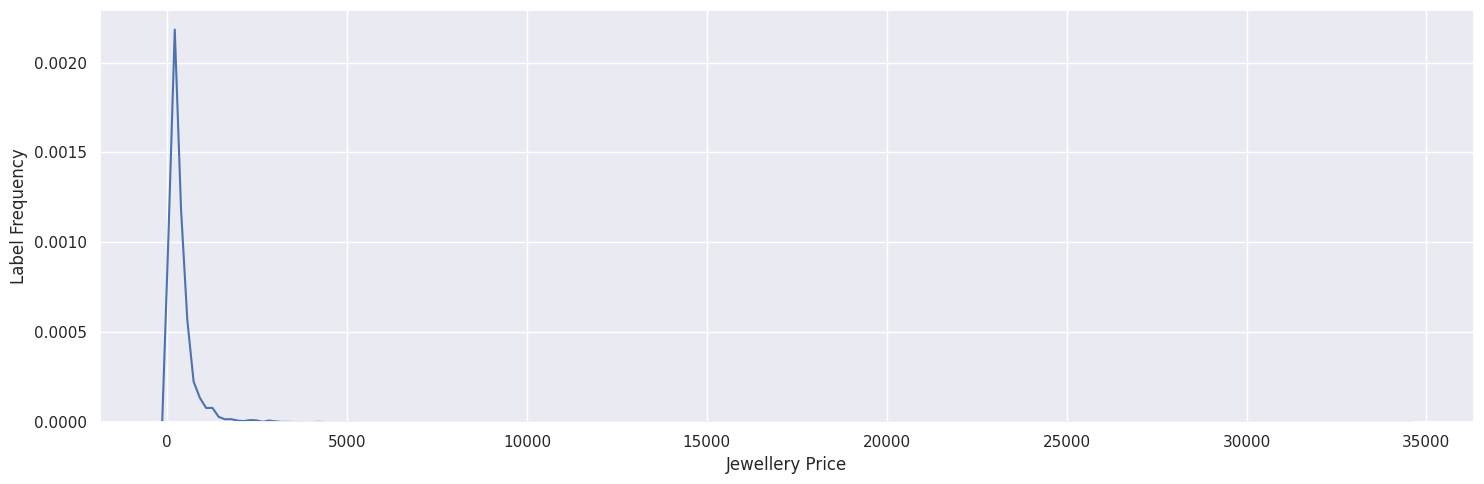

In [20]:
# Bar chart
plt.figure(figsize = (15, 5))
sns.kdeplot(data = data, x = "Price_USD")
plt.xlabel("Jewellery Price")
plt.ylabel("Label Frequency")

plt.tight_layout()
plt.show()

The jewelry prices, which are the target labels, are right-skewed i.e., most outliers exist on the high end. This may imply that most jewelry pieces are sold to  more regular, mainstream buyers, while high-value sales are rarely conducted.

##### Target Gender Analysis

According to social norms, females are more likely to be interested in jewelry than their male counterparts [[PAPER](https://www.jcreview.com/admin/Uploads/Files/61ded785882d06.51262907.pdf)], and this skew can be very extreme. It can be interesting to see how this might reflect in this dataset.

In [21]:
# Jewelry target gender distribution
data["Target_Gender"].value_counts()

,count
Target_Gender,
f,46656
m,359


In [22]:
# Jewelry target gender distribution
data["Target_Gender"].value_counts(normalize = True) * 100

,proportion
Target_Gender,
f,99.236414
m,0.763586


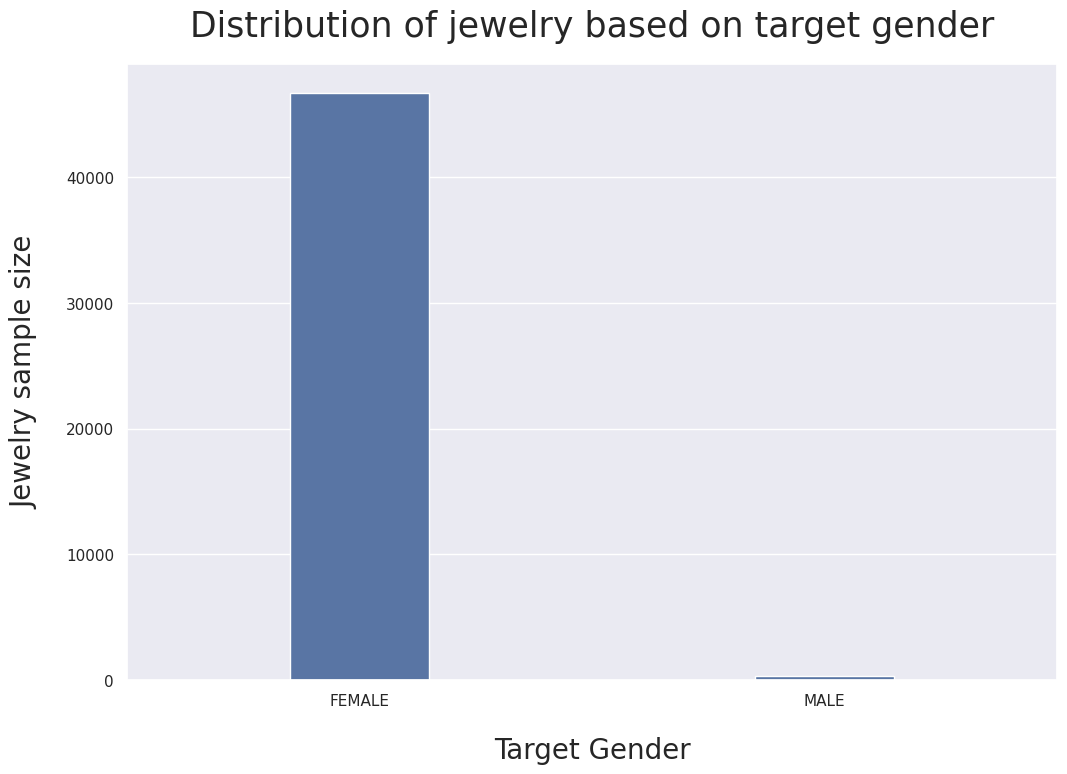

In [23]:
# Visualize jewelry distribution by gender
plt.figure(figsize = (12, 8))

sns.countplot(data=data, x = "Target_Gender", width = 0.3)
plt.title("Distribution of jewelry based on target gender", fontsize=25, pad=20)

plt.xlabel("Target Gender", fontsize=20, labelpad=20)
plt.ylabel("Jewelry sample size", fontsize=20, labelpad=20)

plt.xticks([0, 1], ['FEMALE', 'MALE'])

plt.show(); plt.close("all")

Based on the short univariate analysis above, we can conclude that a majority of jewelry pieces are specifically targeted toward women. This would probably be a result of market analysis.

We can thus assume that the __male__ value in the __Target_Gender__ column is a rare one. This leaves us with one of two options:

1. Retain the column or
2. Eliminate the column, as it does not give us much diversity within gender.

Since this state of affairs is an actual representation of the real-world distribution and how the genders interact with jewelry, the final decision we will make here will be to retain the column.

##### Jewelry Category Analysis

It would make some sense to observe the different jewelry categories on sale.

In [24]:
# Jewelry category distribution
data["Category"].value_counts()

,count
Category,
jewelry.earring,29021
jewelry.ring,26012
jewelry.pendant,13062
jewelry.bracelet,6121
0,4020
...,...
626.58,1
13.42,1
2.88,1


In [25]:
# Top 10 categories by sample size
data["Category"].value_counts()[:10]

,count
Category,
jewelry.earring,29021
jewelry.ring,26012
jewelry.pendant,13062
jewelry.bracelet,6121
0,4020
jewelry.necklace,2330
jewelry.brooch,1285
jewelry.souvenir,170
electronics.clocks,165


In [26]:
data["Category"].unique()

array(['jewelry.earring', nan, 'jewelry.pendant', 'jewelry.necklace',
       'jewelry.ring', 'jewelry.brooch', 'jewelry.bracelet',
       'electronics.clocks', 'jewelry.souvenir', '230.12', '202.36',
       '1098.03', '321.78', '1128.62', '81.27', '34.25', '582.16',
       '227.37', '234.22', '150.55', '131.82', '2123.15', '109.45',
       '49.22', '472.47', '205.38', '2746.44', '51.08', '231.12', '76.97',
       '3054.73', '184.9', '380.1', '357.49', '15.47', '135.33', '719.75',
       '93.01', '177.95', 'jewelry.stud', '102.1', '595.75', '469.56',
       '427.07', '53.62', '77.53', '1469.18', '355.27', '184.89',
       '154.66', '300.58', '83.73', '271.19', '3294.21', '278.04',
       '3626.26', '126.03', '283.52', '114.38', '89.04', '8.22', '124.88',
       '89.73', '171.23', '136.93', '19.04', '158.77', '187.1', '151.92',
       '1845.89', '87.23', '248.58', '596.48', '208.88', '193.11',
       '169.84', '1447.68', '45.07', '136.85', '282.05', '61.51',
       '210.21', '137.12', '1

From the short analysis done above, it can be seen that a portion of the data has been corrupted. Rather than containing the accurate jewelry categories, some records contain stringified numerical values instead. This may be due to a number of possible issues such as:

1. Corrupted data recording process
2. Lack of accurate data dictionary (these numerical values may encode some information about other jewelry categories)

Also, it was observed that some records did not describe jewelry, they described electronic clocks instead. These records will have to be filtered out. We can also see that the only jewelry item that seems to be targeted towards the men are _rings_.

We can extract the actual jewelry categories of interest.

In [27]:
# Exctract real jewelry categories
categories = data["Category"].unique().tolist()
categories = [c for c in categories if isinstance(c, str) and c.__contains__("jewelry")]

In [28]:
categories

['jewelry.earring',
 'jewelry.pendant',
 'jewelry.necklace',
 'jewelry.ring',
 'jewelry.brooch',
 'jewelry.bracelet',
 'jewelry.souvenir',
 'jewelry.stud']

In [29]:
# Extract records with the real categories
real_categories = data.loc[data["Category"].isin(categories), :]

In [30]:
# Check for missing values
100 * real_categories.isnull().sum() / len(data)

,0
Order_datetime,0.000000
Order_ID,0.000000
Product_ID,0.000000
SKU_Quantity,0.000000
Category_ID,0.000000
Category,0.000000
Brand_ID,3.623220
Price_USD,0.000000
User_ID,0.000000
Target_Gender,36.931451


In [31]:
# Fill missing values in categorical columns with mode or placeholder
# Instead of directly modifying the slice, work on the DataFrame by using .loc[]
real_categories.loc[:, "Target_Gender"] = real_categories["Target_Gender"].fillna("Unknown")
real_categories.loc[:, "Brand_ID"] = real_categories["Brand_ID"].fillna(-1)
real_categories.loc[:, "Main_Color"] = real_categories["Main_Color"].fillna(real_categories["Main_Color"].mode()[0])
real_categories.loc[:, "Main_Metal"] = real_categories["Main_Metal"].fillna(real_categories["Main_Metal"].mode()[0])
real_categories.loc[:, "Main_Gem"] = real_categories["Main_Gem"].fillna("None")

# Check for remaining missing values
print(100 * real_categories.isnull().sum() / len(real_categories))


Order_datetime    0.0
Order_ID          0.0
Product_ID        0.0
SKU_Quantity      0.0
Category_ID       0.0
Category          0.0
Brand_ID          0.0
Price_USD         0.0
User_ID           0.0
Target_Gender     0.0
Main_Color        0.0
Main_Metal        0.0
Main_Gem          0.0
Order_Date        0.0
Year              0.0
Month             0.0
dtype: float64


#### Why This Approach?
**Clarity**: Using placeholders like "Unknown", -1, and "None" provides clear markers of missing or unspecified data. It also helps during analysis and model training, as you can distinguish between legitimate data points and entries that require further investigation or treatment.

**Context**: Filling with these specific values makes sense based on the context of the dataset. For example, jewelry with no gem is perfectly plausible and should be marked accordingly.

**Flexibility**: This approach avoids introducing bias and allows you to manage missing data efficiently without affecting the overall analysis.

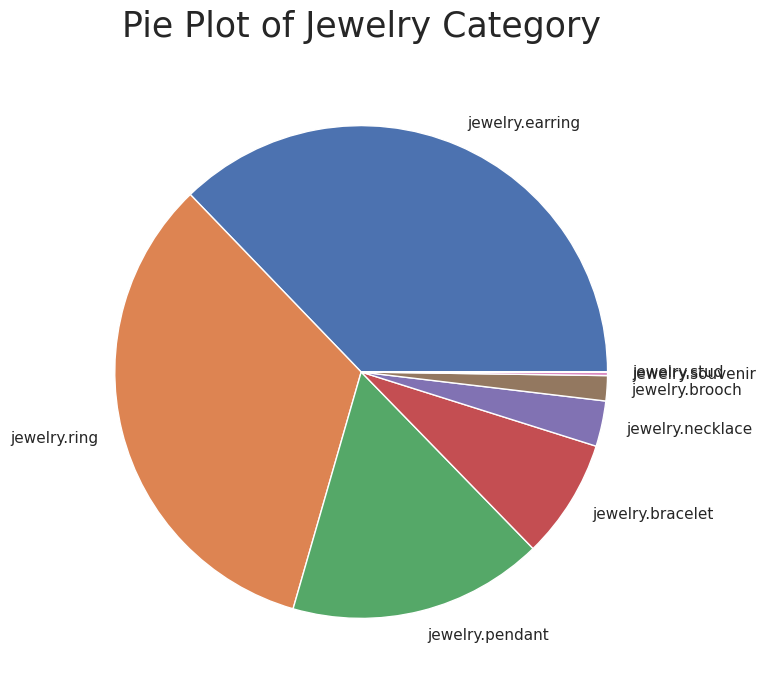

In [32]:
# Visualize the jewelry category via pie chart

jewelry_categories, counts = real_categories["Category"].value_counts().index.tolist(), real_categories["Category"].value_counts().values

plt.figure(figsize = (15, 8))
plt.pie(x=counts, labels=jewelry_categories)

plt.title("Pie Plot of Jewelry Category", fontsize=25, pad=20)

plt.show(); plt.close("all")

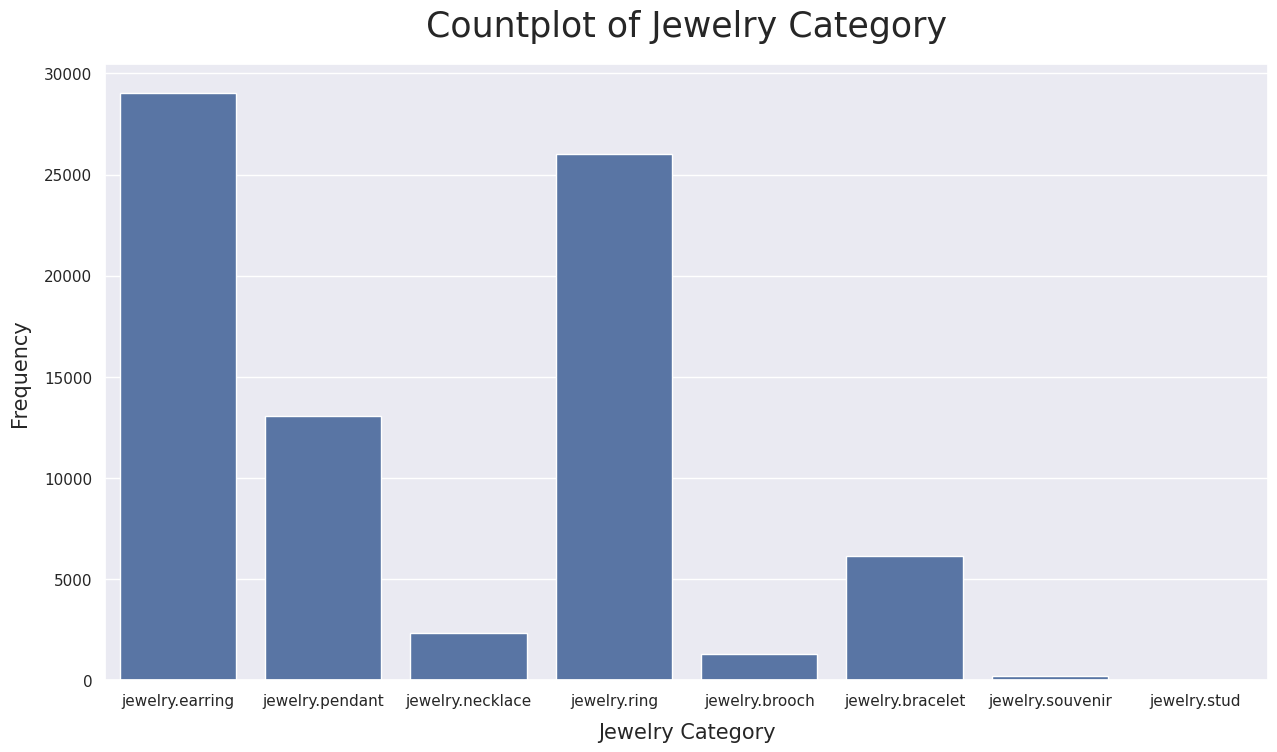

In [33]:
# Visualize the countplot for jewelry category
plt.figure(figsize = (15, 8))
sns.countplot(data=real_categories, x = "Category")

plt.title("Countplot of Jewelry Category", fontsize=25, pad=20)

plt.xlabel("Jewelry Category", fontsize=15, labelpad=10)
plt.ylabel("Frequency", fontsize=15, labelpad=10)

plt.show(); plt.close("all")

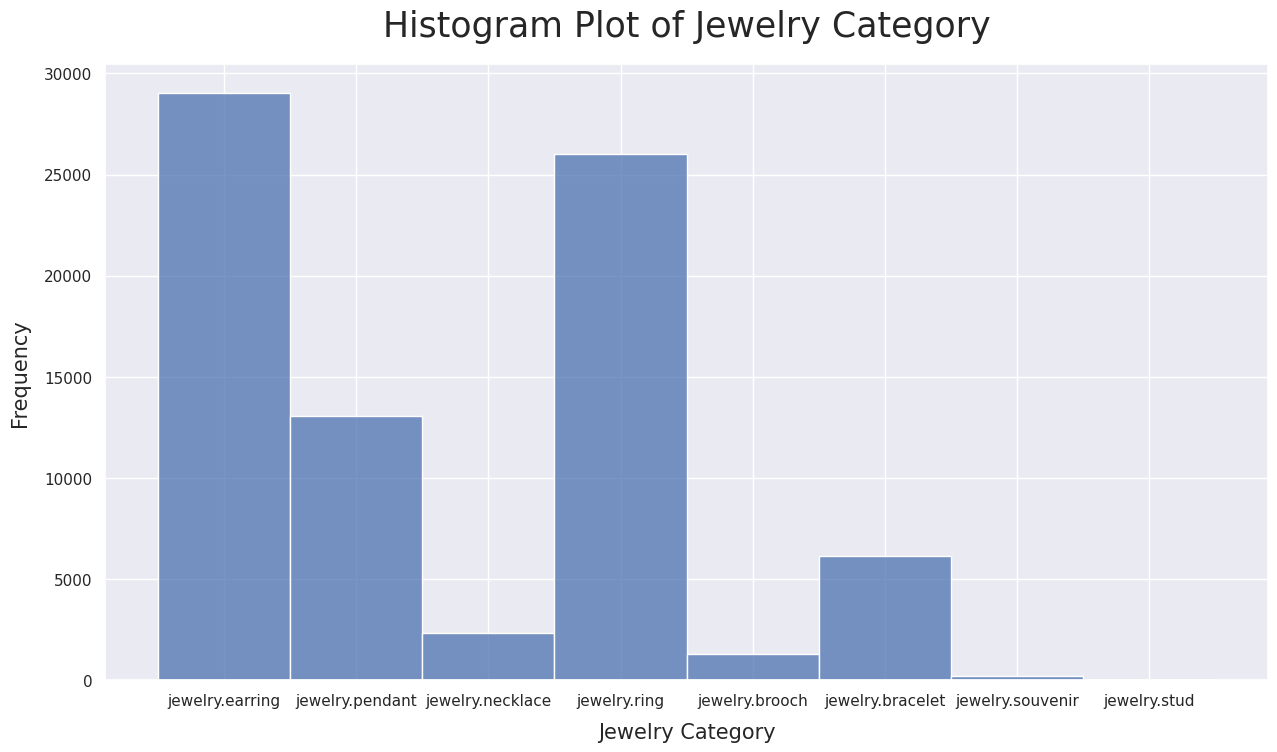

In [34]:
# Visualize the jewelry sample distribution based on jewelry category
plt.figure(figsize = (15, 8))
sns.histplot(data=real_categories, x = "Category")

plt.title("Histogram Plot of Jewelry Category", fontsize=25, pad=20)

plt.xlabel("Jewelry Category", fontsize=15, labelpad=10)
plt.ylabel("Frequency", fontsize=15, labelpad=10)

plt.show(); plt.close("all")

We can also look at a breakdown of the different jewelry categories by target gender.

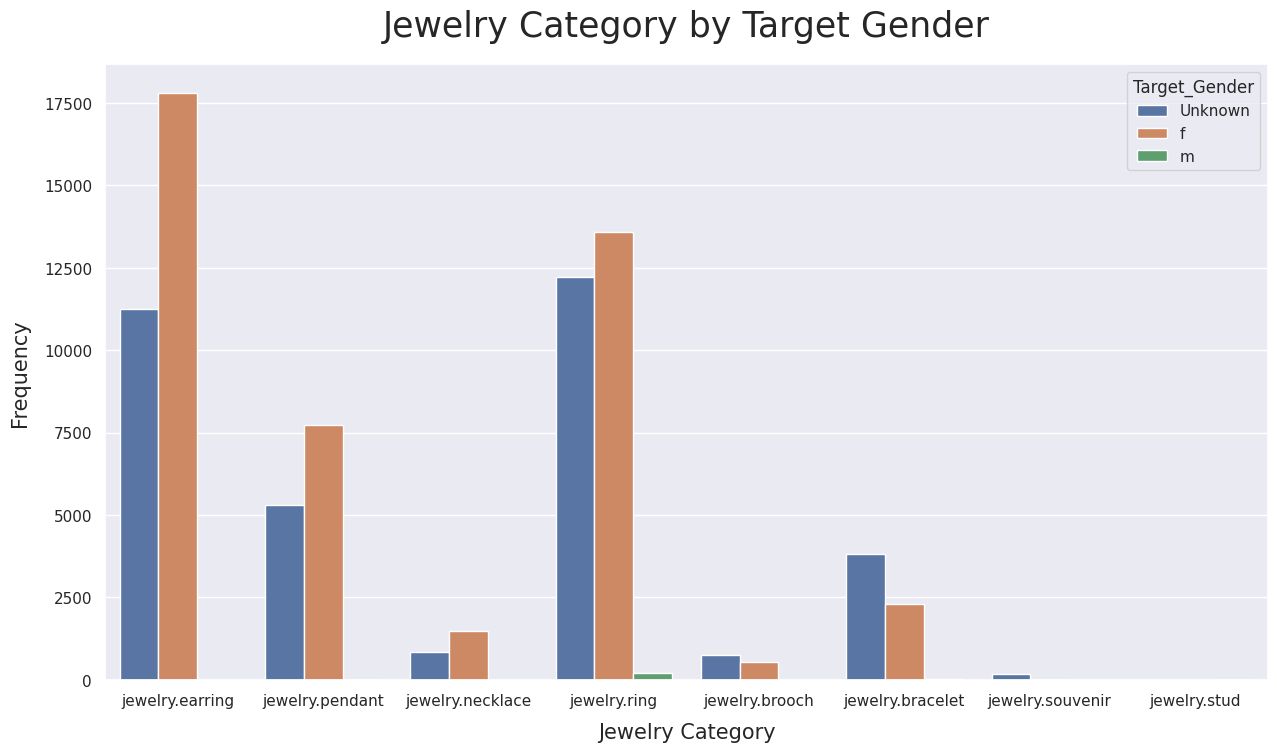

In [35]:
# Jewelry category by gender
plt.figure(figsize = (15, 8))
sns.countplot(data=real_categories, x = "Category", hue = "Target_Gender")

plt.title("Jewelry Category by Target Gender", fontsize=25, pad=20)

plt.xlabel("Jewelry Category", fontsize=15, labelpad=10)
plt.ylabel("Frequency", fontsize=15, labelpad=10)

plt.show(); plt.close("all")

In [36]:
# Jewelry target gender distribution
real_categories["Target_Gender"].value_counts(normalize=True) * 100

,proportion
Target_Gender,
f,55.683027
Unknown,44.005486
m,0.311487


### Feature engineering

In [37]:
real_categories.nunique()

,0
Order_datetime,63412
Order_ID,31012
Product_ID,1550
SKU_Quantity,1
Category_ID,2
Category,8
Brand_ID,7
Price_USD,2849
User_ID,383
Target_Gender,3


### Feature engineering

In [38]:
# Drop irrelevant features from the main DataFrame
real_categories = real_categories.drop(["Order_datetime", "User_ID", "Order_ID", "Order_Date", "SKU_Quantity", "Category_ID", "Product_ID" ], axis=1)


In [39]:
# Small Categories (use pd.factorize for these columns)

small_categories = ["Main_Metal", "Target_Gender", "Category", "Main_Color"]  # Now includes Main_Color
for col in small_categories:
    real_categories.loc[:, col] = pd.factorize(real_categories[col])[0]


# Larger Categories (use One-Hot Encoding for these columns)
large_categories = ["Main_Gem", "Brand_ID"]  # Columns with 7 or more unique categories
real_categories = pd.get_dummies(real_categories, columns=large_categories, drop_first=True)

# Show the final encoded DataFrame
print(real_categories.head())


  Category  Price_USD Target_Gender Main_Color Main_Metal  Year  Month  \
0        0     561.51             0          0          0  2018     12   
2        1      54.66             1          1          0  2018     12   
3        1      88.90             1          0          0  2018     12   
4        2     417.67             0          0          0  2018     12   
5        0     102.27             0          0          0  2018     12   

   Main_Gem_agate  Main_Gem_amber  Main_Gem_amethyst  ...  Main_Gem_spinel  \
0           False           False              False  ...            False   
2           False           False              False  ...            False   
3           False           False              False  ...            False   
4           False           False               True  ...            False   
5           False           False              False  ...            False   

   Main_Gem_topaz  Main_Gem_tourmaline  Main_Gem_turquoise  Brand_ID_0.0  \
0         

In [40]:
# Compute Spearman correlation
correlations = real_categories.corr("spearman")

# Show correlation with target variable (Price_USD)
print(correlations["Price_USD"].sort_values(ascending=False))


Price_USD                       1.000000
Main_Gem_diamond                0.477523
Main_Color                      0.187928
Category                        0.064664
Target_Gender                   0.046384
Main_Gem_emerald                0.042846
Year                            0.035961
Month                           0.027186
Main_Gem_sitall                 0.021890
Main_Gem_quartz                 0.020991
Brand_ID_1.0                    0.020130
Main_Gem_rhodolite              0.018705
Main_Gem_agate                  0.016426
Brand_ID_0.0                    0.013787
Main_Gem_ruby                   0.010319
Main_Gem_nanocrystal            0.009729
Main_Gem_amber                  0.008634
Main_Gem_onyx                   0.005931
Main_Gem_garnet_synthetic       0.005360
Main_Gem_turquoise              0.002748
Main_Gem_mix                    0.002598
Main_Gem_sapphire               0.002536
Main_Gem_corundum_synthetic     0.000280
Main_Gem_sapphire_geothermal   -0.000804
Main_Gem_tourmal

### Key Insights
**High Correlations**:
Main_Gem_diamond (0.477): This has a moderate positive correlation with the price, meaning diamond is likely a significant factor in determining jewelry prices.
Main_Color (0.187) and Category (0.064): These also have some positive correlation, though weaker.

**Negative Correlations**:
Main_Metal (-0.191): There seems to be a negative correlation with price. Depending on the context, it could indicate that certain metals are priced lower, but this will depend on the specific types of metals and their market prices.
Main_Gem_fianit (-0.320): It has a stronger negative correlation. This might suggest that certain gems are associated with lower-priced jewelry.

**Weak or No Correlation**:
Many of the Main_Gem columns (like tourmaline, quartz_smoky, etc.) have very weak correlations or are close to 0, implying that they may not significantly affect the price prediction.

In [41]:
# Define the lower and upper correlation limits
lower_corr_limits = 0.1   # For example, set a lower bound (can be adjusted based on your preference)
upper_corr_limits = 0.9   # Set an upper bound (can be adjusted)


In [42]:
# Create a dictionary of correlated columns based on the correlation limits
correlated_columns = {
    column: correlations[(correlations[column] > lower_corr_limits) & (upper_corr_limits > correlations[column])].index.tolist()
    for column in correlations.columns
}

In [43]:
# Print out the correlated columns
for column, correlated in correlated_columns.items():
    print(f"{column}: {correlated}")

Category: ['Main_Metal']
Price_USD: ['Main_Color', 'Main_Gem_diamond']
Target_Gender: ['Main_Gem_pearl', 'Brand_ID_1.0', 'Brand_ID_2.0']
Main_Color: ['Price_USD', 'Main_Gem_diamond', 'Brand_ID_0.0']
Main_Metal: ['Category', 'Main_Gem_coral', 'Main_Gem_spinel', 'Brand_ID_3.0', 'Brand_ID_4.0']
Year: []
Month: []
Main_Gem_agate: []
Main_Gem_amber: []
Main_Gem_amethyst: []
Main_Gem_chrysolite: []
Main_Gem_chrysoprase: []
Main_Gem_citrine: []
Main_Gem_coral: ['Main_Metal']
Main_Gem_corundum_synthetic: []
Main_Gem_diamond: ['Price_USD', 'Main_Color']
Main_Gem_emerald: []
Main_Gem_emerald_geothermal: []
Main_Gem_fianit: []
Main_Gem_garnet: []
Main_Gem_garnet_synthetic: []
Main_Gem_mix: []
Main_Gem_nacre: []
Main_Gem_nanocrystal: []
Main_Gem_onyx: []
Main_Gem_pearl: ['Target_Gender']
Main_Gem_quartz: []
Main_Gem_quartz_smoky: []
Main_Gem_rhodolite: []
Main_Gem_ruby: []
Main_Gem_sapphire: []
Main_Gem_sapphire_geothermal: []
Main_Gem_sitall: []
Main_Gem_spinel: ['Main_Metal']
Main_Gem_topaz: []


In [44]:
# Filter out columns with no correlations (those with an empty list of correlated columns)
correlated_columns = {k: v for k, v in correlated_columns.items() if len(v) > 0}

# Display columns with correlations
for column, correlated_list in correlated_columns.items():
    print(f"{column} is correlated with: {correlated_list}")


Category is correlated with: ['Main_Metal']
Price_USD is correlated with: ['Main_Color', 'Main_Gem_diamond']
Target_Gender is correlated with: ['Main_Gem_pearl', 'Brand_ID_1.0', 'Brand_ID_2.0']
Main_Color is correlated with: ['Price_USD', 'Main_Gem_diamond', 'Brand_ID_0.0']
Main_Metal is correlated with: ['Category', 'Main_Gem_coral', 'Main_Gem_spinel', 'Brand_ID_3.0', 'Brand_ID_4.0']
Main_Gem_coral is correlated with: ['Main_Metal']
Main_Gem_diamond is correlated with: ['Price_USD', 'Main_Color']
Main_Gem_pearl is correlated with: ['Target_Gender']
Main_Gem_spinel is correlated with: ['Main_Metal']
Brand_ID_0.0 is correlated with: ['Main_Color']
Brand_ID_1.0 is correlated with: ['Target_Gender']
Brand_ID_2.0 is correlated with: ['Target_Gender']
Brand_ID_3.0 is correlated with: ['Main_Metal']
Brand_ID_4.0 is correlated with: ['Main_Metal']


### Key Insights
- Product_ID is correlated with Brand_ID_0.0 and Brand_ID_2.0.
- Category is correlated with Main_Metal—this might be expected if both represent related product attributes.
- Price_USD shows correlations with Main_Color and Main_Gem_diamond, which could indicate a relationship between product attributes and pricing.
- Target_Gender has correlations with Main_Gem_pearl and several brand IDs.
- Columns like Main_Gem_spinel, Main_Gem_coral, and Main_Gem_diamond are correlated with Main_Metal and Price_USD, which can help refine feature selection.

In [45]:
from sklearn.preprocessing import MinMaxScaler

# List of numerical columns to scale
numeric_columns = ['Price_USD', 'Year', 'Month']  # Adjust as needed

# Apply MinMax scaling
scaler = MinMaxScaler()
real_categories[numeric_columns] = scaler.fit_transform(real_categories[numeric_columns])

# Check the transformed data
print(real_categories.head())


  Category  Price_USD Target_Gender Main_Color Main_Metal  Year  Month  \
0        0   0.016272             0          0          0   0.0    1.0   
2        1   0.001558             1          1          0   0.0    1.0   
3        1   0.002552             1          0          0   0.0    1.0   
4        2   0.012096             0          0          0   0.0    1.0   
5        0   0.002940             0          0          0   0.0    1.0   

   Main_Gem_agate  Main_Gem_amber  Main_Gem_amethyst  ...  Main_Gem_spinel  \
0           False           False              False  ...            False   
2           False           False              False  ...            False   
3           False           False              False  ...            False   
4           False           False               True  ...            False   
5           False           False              False  ...            False   

   Main_Gem_topaz  Main_Gem_tourmaline  Main_Gem_turquoise  Brand_ID_0.0  \
0         

#### 2.2. Data Implications

Implied by our findings above, we can say the following:

1. ___Missing values and outliers___: There are a lot of missing values in the dataset. This may be fixed either by value imputation of missingness encoding. As regards outliers, there are quite a lot also. These can be filtered out.

2. ___Data corruption___: Some variables, (e.g., _jewelry_category_) contain corrupt values.

3. ___Rare values___: Some features have some values that occur rarely. A prime instance of this is the _Target_Gender_ column, where the _male_ gender is rarely represented. Sometimes, these are data issues. Other times, like in this case, this can be a true reflection of the distribution from which the data is generated.

4. ___Low cardinality or feature invariance___: The _SKU_Quantity_ feature only has one unique value (e.g., 1). This feature provideds no new information.

5. ___Target skew___: The target variable is highly right-skewed. This can present an issue during training.

6. ___Correlation___: For the most part, the features exhibit low multicollinearity, hence ensuring feature independence. However, the target variable exhibits a low correlation with the independent variables.


---

<div><h3>03. Data Preparation</h3></div>

Based on the *__Data Implications__* discovered prior, the following steps will be experimented upon for the data preparation stage.

1. __Missing Values__: The missing values will be treated via an algorithmic method, ___SimpleImputer___.

2. __Feature Encoding__: The categorical features will be encoded.

3. __Redundant Features__: Certain features will be eliminated for a number of reasons. These are:
   1. _SKU_Quantity_: Feature invariance
   
   2. _Order_ID_: Simple identifier; has no real-world influence on jewelry price.

   3. _Product_ID_: Same with _Order_ID_.

   4. _Order_Datetime_: Avoid data leakage; would not be available in real-world.

4. __Target Skew__: The target variabloe is strongly right-skewed. This can be an issue when learning a mapping from the data space to the label space. Thiis issue will be fixed using the ___TransformedTargetRegressor___ utility.

___NOTE___:
Most of the data preparation steps will be carried out via the use of ___Pipeline___ class from _Sci-kit learn_. The Pipeline object allows us to chain transformers and estimators sequentially for use as one composite object.

### Train Model

In [46]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [47]:
from sklearn.model_selection import train_test_split

# Define features and target
X = real_categories.drop(columns=["Price_USD"])  # Exclude target variable
y = real_categories["Price_USD"]

# Split data into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")


Training samples: 62410, Testing samples: 15603


In [48]:
# List of numeric features to scale (exclude 'Price_USD')
numeric_features = ['Year', 'Month']  # Don't include 'Price_USD' as it's the target

# Categorical features
categorical_features = [col for col in X.columns if col not in numeric_features and col != 'Price_USD']

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),  # No scaling needed, just pass through
        ('cat', 'passthrough', categorical_features)  # Pass through encoded categorical features
    ]
)

# List of models to try
models = {
    "LinearRegression": LinearRegression(),
    "RandomForest": RandomForestRegressor(),
    "XGBoost": XGBRegressor(),
    "LightGBM": LGBMRegressor(),
    "DecisionTree": DecisionTreeRegressor()
}

# Create and store pipelines with model names
pipelines = {
    model_name: Pipeline(steps=[
        ('preprocessor', preprocessor),  # No additional scaling
        ('model', model)
    ])
    for model_name, model in models.items()
}


In [49]:
# Linear Regression Evaluation
from sklearn.metrics import mean_squared_error, r2_score

# Train the model
linear_model = pipelines["LinearRegression"]
linear_model.fit(X_train, y_train)

# Predictions
y_pred = linear_model.predict(X_test)

# RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Calculate RMSE directly using np.sqrt
# R-squared
r2 = r2_score(y_test, y_pred)

# Output
print(f"LinearRegression RMSE: {rmse:.4f}")
print(f"LinearRegression R-squared: {r2:.4f}")

LinearRegression RMSE: 0.0145
LinearRegression R-squared: 0.0908


In [50]:
# Random Forest Evaluation
random_forest_model = pipelines["RandomForest"]
random_forest_model.fit(X_train, y_train)

# Predictions
y_pred_rf = random_forest_model.predict(X_test)

# rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)  # Remove squared=False if using an older version
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))  # Calculate RMSE using NumPy
# R-squared
r2_rf = r2_score(y_test, y_pred_rf)

# Output
print(f"RandomForest RMSE: {rmse_rf:.4f}")
print(f"RandomForest R-squared: {r2_rf:.4f}")

RandomForest RMSE: 0.0126
RandomForest R-squared: 0.3059


In [51]:
# LightGBM Evaluation
lightgbm_model = pipelines["LightGBM"]
lightgbm_model.fit(X_train, y_train)

# Predictions
y_pred_lgb = lightgbm_model.predict(X_test)

# RMSE
rmse_lgb = np.sqrt(mean_squared_error(y_test, y_pred_lgb))

# R-squared
r2_lgb = r2_score(y_test, y_pred_lgb)

# Output
print(f"LightGBM RMSE: {rmse_lgb:.4f}")
print(f"LightGBM R-squared: {r2_lgb:.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005616 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 87
[LightGBM] [Info] Number of data points in the train set: 62410, number of used features: 33
[LightGBM] [Info] Start training from score 0.010206
LightGBM RMSE: 0.0124
LightGBM R-squared: 0.3280


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [52]:
# Decision Tree Evaluation
decision_tree_model = pipelines["DecisionTree"]
decision_tree_model.fit(X_train, y_train)

# Predictions
y_pred_dt = decision_tree_model.predict(X_test)

# RMSE
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))  # Calculate RMSE using NumPy's sqrt
# R-squared
r2_dt = r2_score(y_test, y_pred_dt)

# Output
print(f"DecisionTree RMSE: {rmse_dt:.4f}")
print(f"DecisionTree R-squared: {r2_dt:.4f}")


DecisionTree RMSE: 0.0131
DecisionTree R-squared: 0.2576


### Insights
- LightGBM seems to be the best model based on both RMSE and R-squared.
- Random Forest and XGBoost also perform well but are slightly less accurate than LightGBM.
- Linear Regression has the weakest performance, with a much higher RMSE and lower R-squared

In [53]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grids for each model
param_grid_lightgbm = {
    'model__num_leaves': [31, 63, 127],  # Number of leaves
    'model__learning_rate': [0.01, 0.05, 0.1],  # Learning rate
    'model__n_estimators': [50, 100, 200],  # Number of estimators
    'model__max_depth': [-1, 5, 10]  # Max depth of the tree
}

param_grid_rf = {
    'model__n_estimators': [100, 200],  # Number of trees
    'model__max_depth': [None, 10, 20],  # Max depth of trees
    'model__min_samples_split': [2, 5],  # Min samples to split a node
    'model__min_samples_leaf': [1, 2]  # Min samples per leaf
}

param_grid_xgb = {
    'model__learning_rate': [0.01, 0.05, 0.1],  # Learning rate
    'model__n_estimators': [50, 100, 200],  # Number of estimators
    'model__max_depth': [3, 6, 10],  # Max depth of tree
    'model__subsample': [0.8, 1.0],  # Subsample ratio of training instances
}


In [54]:
# GridSearchCV for LightGBM
grid_search_lightgbm = GridSearchCV(pipelines['LightGBM'], param_grid_lightgbm, cv=3, verbose=1, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search_lightgbm.fit(X_train, y_train)

# Best parameters and score for LightGBM
print("Best parameters for LightGBM:", grid_search_lightgbm.best_params_)
print("Best score for LightGBM:", grid_search_lightgbm.best_score_)


Fitting 3 folds for each of 81 candidates, totalling 243 fits


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008410 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 87
[LightGBM] [Info] Number of data points in the train set: 62410, number of used features: 33
[LightGBM] [Info] Start training from score 0.010206
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Best parameters for LightGBM: {'model__learning_rate': 0.1, 'model__max_depth': 10, 'model__n_estimators': 200, 'model__num_leaves': 31}
Best score for LightGBM: -0.00010775900778322743


In [55]:
# GridSearchCV for RandomForest
grid_search_rf = GridSearchCV(pipelines['RandomForest'], param_grid_rf, cv=3, verbose=1, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)

# Best parameters and score for RandomForest
print("Best parameters for RandomForest:", grid_search_rf.best_params_)
print("Best score for RandomForest:", grid_search_rf.best_score_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best parameters for RandomForest: {'model__max_depth': 20, 'model__min_samples_leaf': 2, 'model__min_samples_split': 5, 'model__n_estimators': 100}
Best score for RandomForest: -0.00010985495689499363


In [56]:
# GridSearchCV for XGBoost
grid_search_xgb = GridSearchCV(pipelines['XGBoost'], param_grid_xgb, cv=3, verbose=1, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search_xgb.fit(X_train, y_train)

# Best parameters and score for XGBoost
print("Best parameters for XGBoost:", grid_search_xgb.best_params_)
print("Best score for XGBoost:", grid_search_xgb.best_score_)


Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best parameters for XGBoost: {'model__learning_rate': 0.05, 'model__max_depth': 6, 'model__n_estimators': 200, 'model__subsample': 0.8}
Best score for XGBoost: -0.0001097589176829675


In [57]:
# Best parameters for LightGBM
lightgbm_best_params = {
    'model__learning_rate': 0.1,
    'model__max_depth': 10,
    'model__n_estimators': 200,
    'model__num_leaves': 31
}
# Define the pipeline for each model
lightgbm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LGBMRegressor())
])
# LightGBM
lightgbm_pipeline.set_params(**lightgbm_best_params)
lightgbm_pipeline.fit(X_train, y_train)
y_pred_lightgbm = lightgbm_pipeline.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011544 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 87
[LightGBM] [Info] Number of data points in the train set: 62410, number of used features: 33
[LightGBM] [Info] Start training from score 0.010206
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [58]:
# Best parameters for RandomForest
rf_best_params = {
    'model__max_depth': None,
    'model__min_samples_leaf': 2,
    'model__min_samples_split': 5,
    'model__n_estimators': 100
}

rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor())
])

rf_pipeline.set_params(**rf_best_params)
rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)


In [59]:
# Best parameters for XGBoost
xgb_best_params = {
    'model__learning_rate': 0.05,
    'model__max_depth': 6,
    'model__n_estimators': 200,
    'model__subsample': 0.8
}

xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBRegressor())
])

xgb_pipeline.set_params(**xgb_best_params)
xgb_pipeline.fit(X_train, y_train)
y_pred_xgb = xgb_pipeline.predict(X_test)


In [60]:
# Evaluate performance
from sklearn.metrics import mean_squared_error, r2_score

# Calculate RMSE and R-squared for each model
def evaluate_model(y_test, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred)) # Calculate RMSE using NumPy's sqrt
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} RMSE: {rmse:.4f}")
    print(f"{model_name} R-squared: {r2:.4f}")

# Evaluate each model
evaluate_model(y_test, y_pred_lightgbm, "LightGBM")
evaluate_model(y_test, y_pred_rf, "RandomForest")
evaluate_model(y_test, y_pred_xgb, "XGBoost")


LightGBM RMSE: 0.0122
LightGBM R-squared: 0.3515
RandomForest RMSE: 0.0124
RandomForest R-squared: 0.3357
XGBoost RMSE: 0.0125
XGBoost R-squared: 0.3226


### Interpretation of Results:
- LightGBM has the best performance overall.
- RandomForest and XGBoost are also performing relatively well, but with slightly higher RMSE and lower R-squared compared to LightGBM

## MLFLOW

In [67]:
pip install pyngrok

In [68]:
!pip install mlflow
import mlflow
import mlflow.sklearn
from pyngrok import ngrok
import os
import time

In [76]:
# Stop existing ngrok tunnels before starting a new one
!pkill -f ngrok  # Kill existing ngrok process

In [77]:
# Authenticate ngrok with your token (Ensure token is provided)
ngrok_token = "2mr1L9QaWuIaXaixSkUEjCnM6M4_2N3RfbBXd7fF5rLNe1zAn"  # Replace with your actual ngrok token
if ngrok_token:
    os.system(f"ngrok authtoken {ngrok_token}")
else:
    raise ValueError("Ngrok token is missing. Please provide a valid token.")


In [78]:
# Start MLflow Tracking UI locally
mlflow.set_tracking_uri("http://127.0.0.1:5000")


In [79]:
# Start MLflow server in the background
get_ipython().system_raw("mlflow server --host 0.0.0.0 --port 5000 --backend-store-uri file:/content/mlruns &")

In [80]:
# Start ngrok to expose MLflow UI
public_url = ngrok.connect(5000, "http")
print(f"MLflow Tracking UI is live at: {public_url}")

MLflow Tracking UI is live at: NgrokTunnel: "https://5adf-35-190-183-220.ngrok-free.app" -> "http://localhost:5000"


In [81]:
# Start an MLflow experiment
mlflow.set_experiment("Jewery_Price_Prediction")

2025/02/17 03:21:41 INFO mlflow.tracking.fluent: Experiment with name 'Jewery_Price_Prediction' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/275730054780801238', creation_time=1739762501736, experiment_id='275730054780801238', last_update_time=1739762501736, lifecycle_stage='active', name='Jewery_Price_Prediction', tags={}>

In [82]:
# Function to evaluate and log models in MLflow
def evaluate_and_log_model(model, X_train, y_train, X_test, y_test, model_name, params):
    with mlflow.start_run(run_name=model_name):
        # Train the model
        model.fit(X_train, y_train)

        # Predict
        y_pred = model.predict(X_test)

        # Compute metrics
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        # Log parameters
        mlflow.log_params(params)

        # Log metrics
        mlflow.log_metric("RMSE", rmse)
        mlflow.log_metric("R2 Score", r2)

        # Log model
        mlflow.sklearn.log_model(model, model_name)

        print(f"Logged {model_name} - RMSE: {rmse:.4f}, R2 Score: {r2:.4f}")


In [83]:
# Models and their hyperparameters
models = {
    "LightGBM": (lightgbm_pipeline, lightgbm_best_params),
    "RandomForest": (rf_pipeline, rf_best_params),  # Use rf_pipeline and rf_best_params
    "XGBoost": (xgb_pipeline, xgb_best_params),
}

# Run the evaluation and logging for each model
for model_name, (model, params) in models.items():
    evaluate_and_log_model(model, X_train, y_train, X_test, y_test, model_name, params)

print("\n✅ All models logged successfully in MLflow!")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011986 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 87
[LightGBM] [Info] Number of data points in the train set: 62410, number of used features: 33
[LightGBM] [Info] Start training from score 0.010206
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
2025/02/17 03:22:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged LightGBM - RMSE: 0.0122, R2 Score: 0.3515
🏃 View run LightGBM at: http://127.0.0.1:5000/#/experiments/275730054780801238/runs/e8b2214c25a24df18659c7778fe7d527
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/275730054780801238


2025/02/17 03:22:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged RandomForest - RMSE: 0.0125, R2 Score: 0.3185
🏃 View run RandomForest at: http://127.0.0.1:5000/#/experiments/275730054780801238/runs/6a86085b54ea45d3a3a7c581f9d9a448
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/275730054780801238


2025/02/17 03:23:04 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged XGBoost - RMSE: 0.0125, R2 Score: 0.3226
🏃 View run XGBoost at: http://127.0.0.1:5000/#/experiments/275730054780801238/runs/415aea4408094f4b8f813a57927c363a
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/275730054780801238

✅ All models logged successfully in MLflow!


In [86]:
import joblib

# Save Factorization Mappings
factorized_mappings = {
    "Main_Metal": list(real_categories["Main_Metal"].unique()),
    "Target_Gender": list(real_categories["Target_Gender"].unique()),
    "Category": list(real_categories["Category"].unique()),
    "Main_Color": list(real_categories["Main_Color"].unique())
}
joblib.dump(factorized_mappings, "factorized_mappings.pkl")

# Save One-Hot Encoder Column Names
one_hot_columns = list(real_categories.columns)  # Save all columns after encoding
joblib.dump(one_hot_columns, "one_hot_columns.pkl")

# Save MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(real_categories[["Price_USD", "Year", "Month"]])  # Fit scaler
joblib.dump(scaler, "scaler.pkl")

# Save Model
joblib.dump(lightgbm_pipeline, "lightgbm_model.pkl")


['lightgbm_model.pkl']